In [16]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
## parmaters 1
ConsiderTC1 = 1
ConsiderMB1 = 1
informal1 = 0.11
discount1 = 0.02
scenario1 = 'val'

## parmaters 2
ConsiderTC2 = 0
ConsiderMB2 = 1
informal2 = 0.11
discount2 = 0.02
scenario2 = 'val'


In [18]:
# only keep results
df_input = pd.read_csv('results/aggregate_results_imputed.csv')
# df_input = pd.read_csv('imputation/aggregate_results_imputed.csv')

df = df_input[(df_input['discount']==discount1)&
        (df_input['ConsiderTC']==ConsiderTC1)&
        (df_input['ConsiderMB']==ConsiderMB1)&
        (df_input['informal']==informal1)&
        (df_input['discount']==discount1)&
        (df_input['scenario']==scenario1)]
df = df.reset_index().drop(columns=['index'])
df = df[df['tax'] > 0]

df2 = df_input[(df_input['discount']==discount2)&
        (df_input['ConsiderTC']==ConsiderTC2)&
        (df_input['ConsiderMB']==ConsiderMB2)&
        (df_input['informal']==informal2)&
        (df_input['discount']==discount2)&
        (df_input['scenario']==scenario2)]
df2 = df2.reset_index().drop(columns=['index'])
df2 = df2[df2['tax'] > 0]

df = df.groupby('Country Code').sum().reset_index()
df2 = df2.groupby('Country Code').sum().reset_index()

countries_info = pd.read_csv('data/dl1_countrycodeorg_country_name.csv')
countries_info = countries_info[['Country Code', 'Region', 'Income group']]
codemap = countries_info.dropna()
df = df.merge(codemap, on='Country Code')
df2 = df2.merge(codemap, on='Country Code')

print(df.head())
print(len(df))

  Country Code  ConsiderTC  ConsiderMB  informal  discount      GDPloss  \
0          AFG           1           1      0.11      0.02    49.896032   
1          AGO           1           1      0.11      0.02    48.042942   
2          ALB           1           1      0.11      0.02    33.500875   
3          AND           1           1      0.11      0.02     6.078215   
4          ARE           1           1      0.11      0.02  1220.771360   

        tax        pc_loss                      Region         Income group  
0  0.020504     953.788823                  South Asia           Low income  
1  0.009700     916.328300          Sub-Saharan Africa  Lower middle income  
2  0.025102   12406.792105       Europe & Central Asia  Upper middle income  
3  0.036537   78339.598149       Europe & Central Asia          High income  
4  0.040730  116219.612453  Middle East & North Africa          High income  
199


In [19]:
df2

,Country Code,ConsiderTC,ConsiderMB,informal,discount,GDPloss,tax,pc_loss,Region,Income group
0,AFG,0,1,0.11,0.02,46.809885,0.019235,894.795505,South Asia,Low income
1,AGO,0,1,0.11,0.02,46.193146,0.009327,881.046946,Sub-Saharan Africa,Lower middle income
2,ALB,0,1,0.11,0.02,33.024464,0.024745,12230.357197,Europe & Central Asia,Upper middle income
3,AND,0,1,0.11,0.02,5.705250,0.034295,73532.599241,Europe & Central Asia,High income
4,ARE,0,1,0.11,0.02,1145.976208,0.038234,109098.980453,Middle East & North Africa,High income
...,...,...,...,...,...,...,...,...,...,...
194,WSM,0,1,0.11,0.02,2.188922,0.039627,9419.296360,East Asia & Pacific,Lower middle income
195,YEM,0,1,0.11,0.02,50.002978,0.013582,1269.730560,Middle East & North Africa,Low income
196,ZAF,0,1,0.11,0.02,371.516816,0.018872,5461.716799,Sub-Saharan Africa,Upper middle income
197,ZMB,0,1,0.11,0.02,18.189041,0.008294,655.110752,Sub-Saharan Africa,Lower middle income


In [20]:
data = df[['GDPloss','Country Code']].merge(df2[['GDPloss','Country Code']],on='Country Code')

In [21]:
data['TC'] = 1-data['GDPloss_y']/data['GDPloss_x']

In [22]:
data

,GDPloss_x,Country Code,GDPloss_y,TC
0,49.896032,AFG,46.809885,0.061852
1,48.042942,AGO,46.193146,0.038503
2,33.500875,ALB,33.024464,0.014221
3,6.078215,AND,5.705250,0.061361
4,1220.771360,ARE,1145.976208,0.061269
...,...,...,...,...
194,2.331712,WSM,2.188922,0.061238
195,53.316416,YEM,50.002978,0.062147
196,408.305280,ZAF,371.516816,0.090100
197,18.956172,ZMB,18.189041,0.040469


In [23]:
data[data['Country Code']=='CHN']

,GDPloss_x,Country Code,GDPloss_y,TC
34,23714.319494,CHN,21557.54194,0.090948


In [24]:
data[data['Country Code']=='USA']

,GDPloss_x,Country Code,GDPloss_y,TC
188,36180.701785,USA,32218.448975,0.109513


In [25]:
data.sort_values('TC', ascending=False)

,GDPloss_x,Country Code,GDPloss_y,TC
29,18.346873,BWA,12.705398,0.307490
123,18.576165,MOZ,14.438774,0.222726
52,106.916081,ECU,83.709158,0.217057
140,188.486647,PER,151.562868,0.195896
84,440.975788,IRQ,356.296280,0.192028
...,...,...,...,...
27,39.858214,BRN,39.590115,0.006726
26,6.315776,BRB,6.279665,0.005718
104,892.610264,LKA,888.191982,0.004950
186,41.819365,UKR,41.693129,0.003019


In [26]:
ratio = (1-df2.groupby('Income group').sum()['GDPloss']/df.groupby('Income group').sum()['GDPloss']).to_frame('TC')
ratio = ratio.sort_values('TC')*100
ratio = ratio.reset_index()
ratio

,Income group,TC
0,Lower middle income,2.365119
1,Low income,4.802650
2,Upper middle income,8.034277
3,High income,8.172920


In [27]:
df2

,Country Code,ConsiderTC,ConsiderMB,informal,discount,GDPloss,tax,pc_loss,Region,Income group
0,AFG,0,1,0.11,0.02,46.809885,0.019235,894.795505,South Asia,Low income
1,AGO,0,1,0.11,0.02,46.193146,0.009327,881.046946,Sub-Saharan Africa,Lower middle income
2,ALB,0,1,0.11,0.02,33.024464,0.024745,12230.357197,Europe & Central Asia,Upper middle income
3,AND,0,1,0.11,0.02,5.705250,0.034295,73532.599241,Europe & Central Asia,High income
4,ARE,0,1,0.11,0.02,1145.976208,0.038234,109098.980453,Middle East & North Africa,High income
...,...,...,...,...,...,...,...,...,...,...
194,WSM,0,1,0.11,0.02,2.188922,0.039627,9419.296360,East Asia & Pacific,Lower middle income
195,YEM,0,1,0.11,0.02,50.002978,0.013582,1269.730560,Middle East & North Africa,Low income
196,ZAF,0,1,0.11,0.02,371.516816,0.018872,5461.716799,Sub-Saharan Africa,Upper middle income
197,ZMB,0,1,0.11,0.02,18.189041,0.008294,655.110752,Sub-Saharan Africa,Lower middle income


/Users/caozhong/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


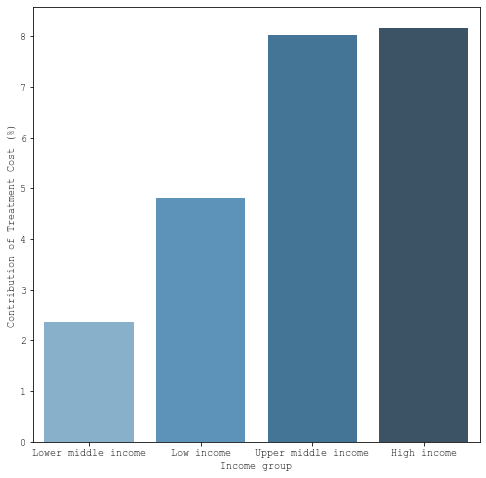

In [28]:
plt.rcParams['font.family']='Courier New, monospace'
fig, ax = plt.subplots(figsize=(8,8))  # create figure & 1 axis
ax = sns.barplot("Income group", y="TC", data=ratio, palette="Blues_d")
ax.set_ylabel('Contribution of Treatment Cost (%)')
plt.savefig('tables/figure_S4.pdf')

In [29]:
ratio = (1 - df2.groupby('Region').sum()['GDPloss']/df.groupby('Region').sum()['GDPloss']).to_frame('TC')
ratio = ratio.sort_values('TC')*100
ratio = ratio.reset_index()
ratio

,Region,TC
0,South Asia,1.291893
1,Europe & Central Asia,5.679632
2,Sub-Saharan Africa,5.837248
3,Middle East & North Africa,7.192821
4,East Asia & Pacific,7.289728
5,Latin America & Caribbean,8.922585
6,North America,10.705999


/Users/caozhong/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


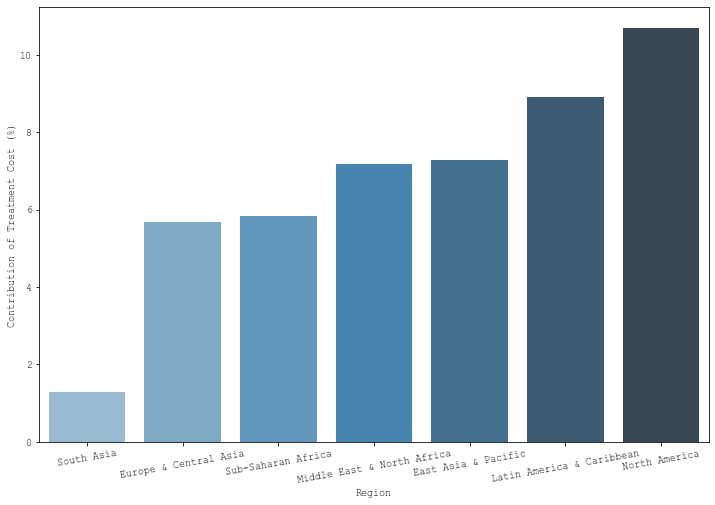

In [30]:
fig, ax = plt.subplots(figsize=(12,8))  # create figure & 1 axis
ax = sns.barplot("Region", y="TC", data=ratio, palette="Blues_d")
ax.set_ylabel('Contribution of Treatment Cost (%)')
plt.xticks(rotation=10)
plt.savefig('tables/figure_S5.pdf')